In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

# EDA

1) Данные с Kaggle - https://www.kaggle.com/uciml/breast-cancer-wisconsin-data#data.csv

In [24]:
df=pd.read_csv("breast_cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [25]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Unnamed: 32 является бесполезным признаком, поэтому мы его удалим из датафрейма.
Также id можно дропнуть.

In [26]:
to_drop = ['id', 'Unnamed: 32']
df.drop(to_drop, axis=1, inplace=True)

In [27]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [28]:
target = df['diagnosis']

### Визуализация  

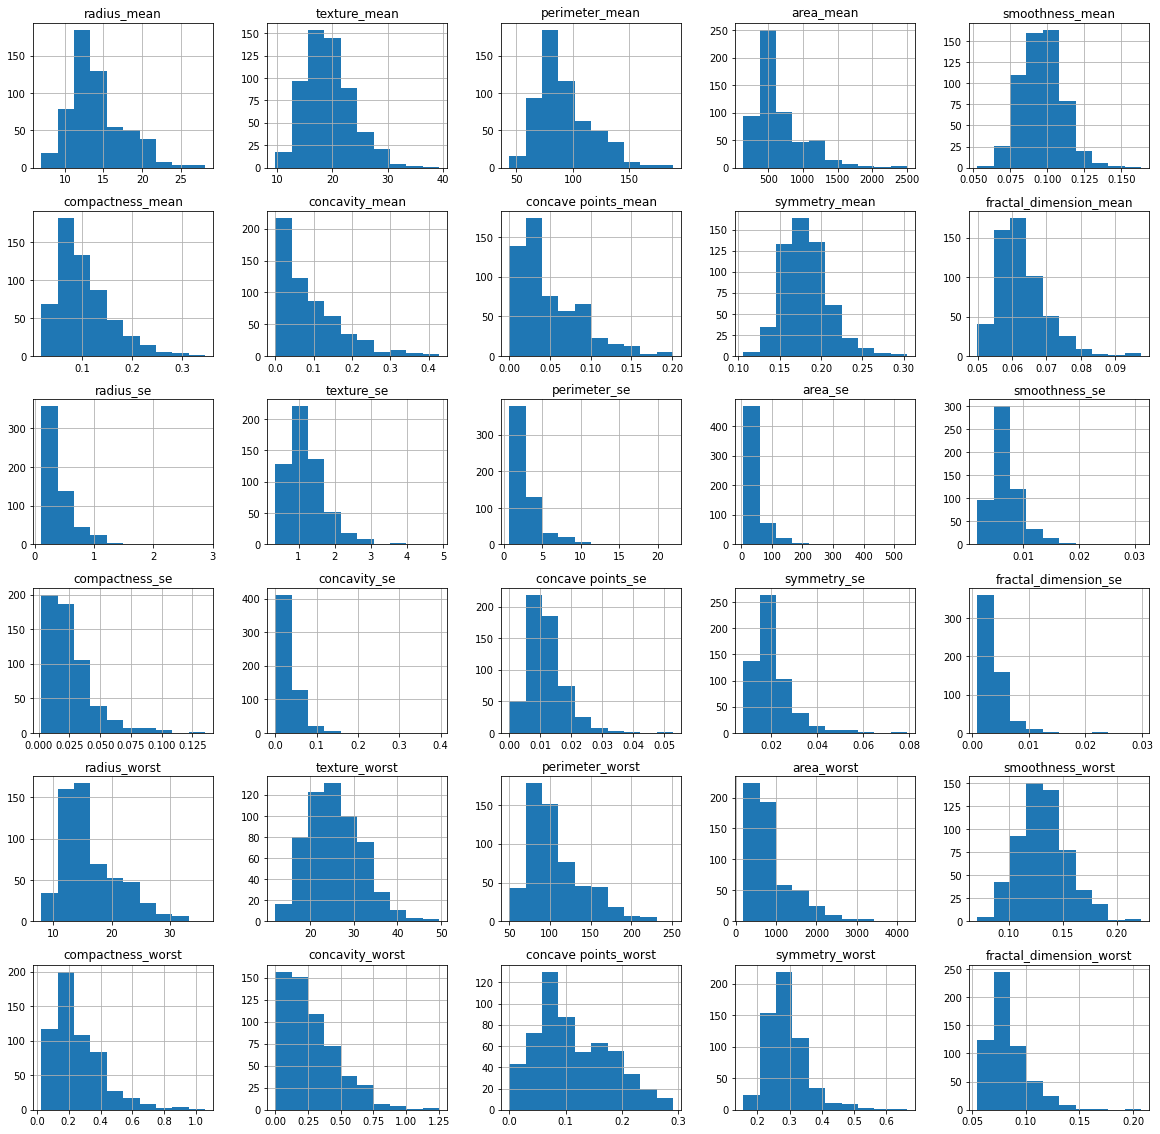

In [33]:
df.hist(figsize=(20, 20));

#### Radius mean 

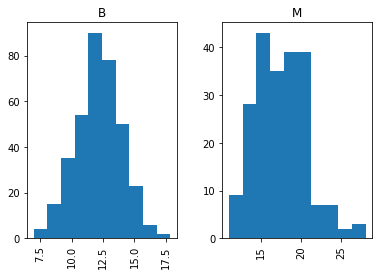

In [36]:
df.hist(column='radius_mean', by = 'diagnosis'); 

Злокачественные опухоли имеют большой радиус по сравнению с доброкачественными.

Радиус доброкач. опухолей имеет нормальное распределение.

#### Texture mean

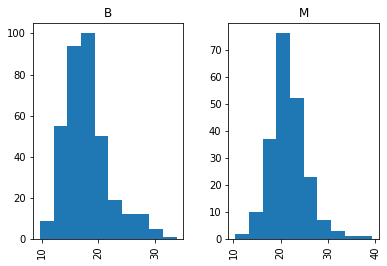

In [37]:
df.hist(column='texture_mean', by = 'diagnosis'); 

Злокачест. опухоли имеют большой texture mean, чем доброкачест.

#### Smoothness mean 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA9EC27E48>,
      dtype=object)

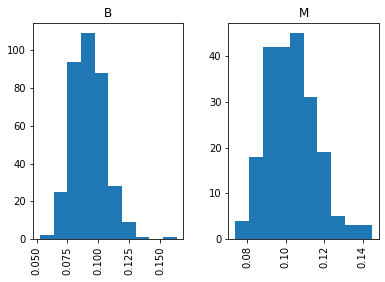

In [39]:
df.hist(column='smoothness_mean', by = 'diagnosis')

#### Compactness mean 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA9ED28988>,
      dtype=object)

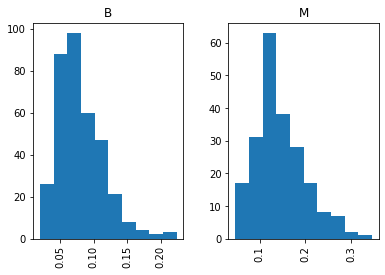

In [41]:
df.hist(column='compactness_mean', by = 'diagnosis')

#### Heatmap для матрицы корреляции 

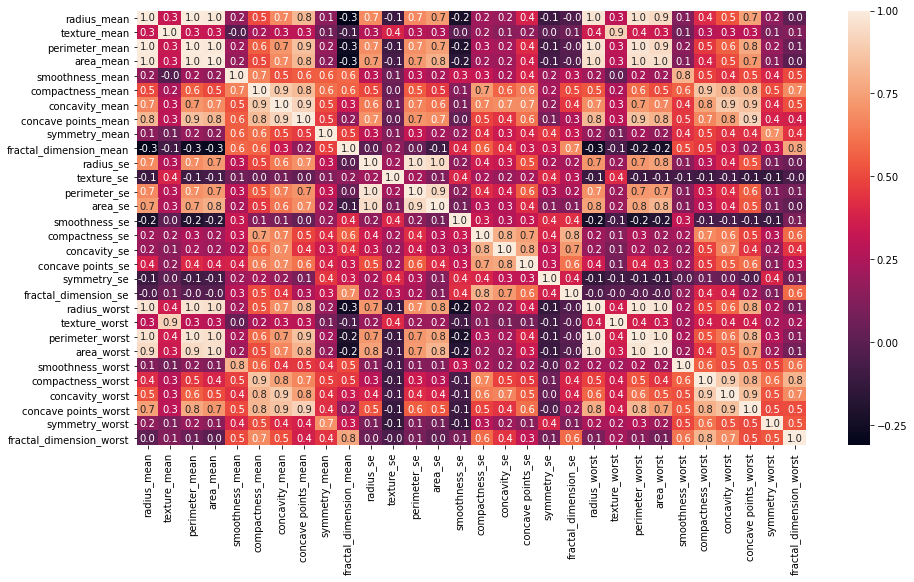

In [42]:
сorr = df.corr()
plt.figure(figsize=(15,8));
sns.heatmap(сorr, annot=True, fmt='.1f');

In [46]:
CorField = []
for i in сorr:
    for j in сorr.index[сorr[i] > 0.8]:
        if i != j and j not in CorField and i not in CorField:
            CorField.append(j)
            print (i, j, сorr[i][сorr.index == j].values[0])

radius_mean perimeter_mean 0.9978552814938113
radius_mean area_mean 0.9873571700566119
radius_mean concave points_mean 0.8225285223871791
radius_mean radius_worst 0.9695389726112053
radius_mean perimeter_worst 0.9651365139559878
radius_mean area_worst 0.9410824595860459
texture_mean texture_worst 0.9120445888404215
smoothness_mean smoothness_worst 0.8053241954943631
compactness_mean concavity_mean 0.8831206701772499
compactness_mean compactness_worst 0.8658090398022638
compactness_mean concavity_worst 0.8162752498000281
compactness_mean concave points_worst 0.8155732235690654
radius_se perimeter_se 0.9727936770160752
radius_se area_se 0.95183011211099
compactness_se concavity_se 0.8012683427383301
compactness_se fractal_dimension_se 0.8032688176617685


Сильно между собой скоррелированы (больше 0.8):
1. radius_mean с perimeter_mean, area_mean, concave points_mean, radius_worst, perimeter_worst, area_worst
2. Еще texture_mean c texture_worst
3. Также smoothness_mean c smoothness_worst
4. compactness_mean c признаками concavity_mean, compactness_worst, concavity_worst, concave points_worst
5. radius_se perimeter_se, area_se
6. compactness_se concavity_se, compactness_se, fractal_dimension_se

Построим для сильно скоррелированных признаков попарные scatterplot-ы, чтобы проверить действительно ли наблюдается линейная зависимость?

In [53]:
corr_with = ['perimeter_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst']

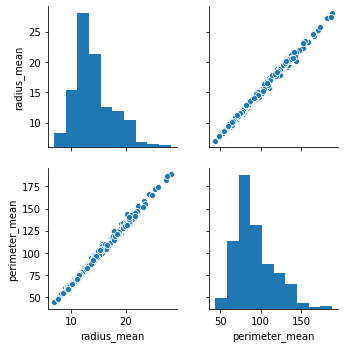

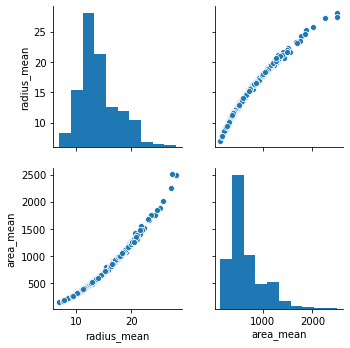

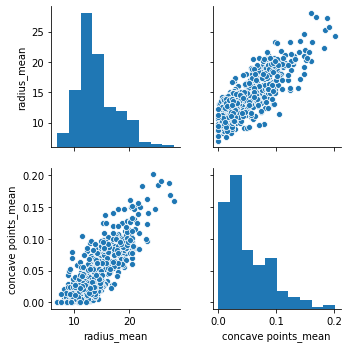

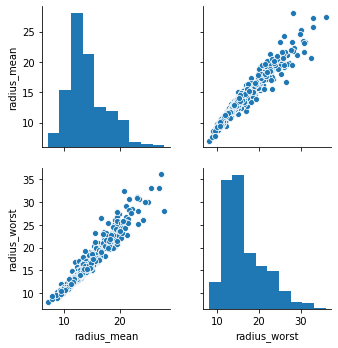

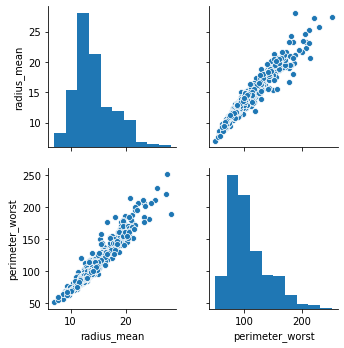

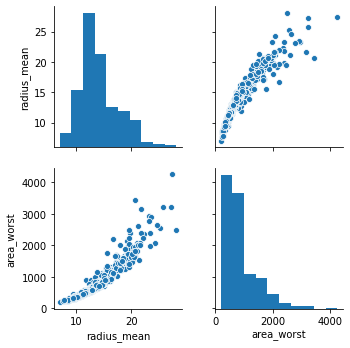

In [54]:
for feature in corr_with:
    sns.pairplot(df[['radius_mean', feature]])


Видна линейная зависимость у radius_mean с параметрами perimeter_mean, concave points_mean, radius_worst, perimeter_worst.

Также неочевидная линенайная зависимость radius_mean с area_worst, area_mean, так как видна более квадратичная зависимость (парабола).

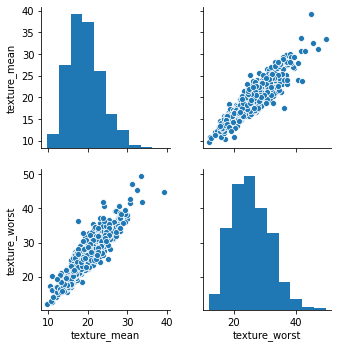

In [57]:
sns.pairplot(df[['texture_mean', 'texture_worst']])
#очевидная линейная зависимость

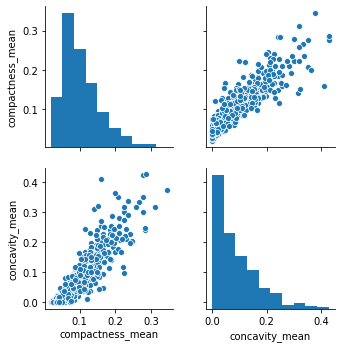

In [58]:
sns.pairplot(df[['compactness_mean', 'concavity_mean']])
#очевидная линейная зависимость

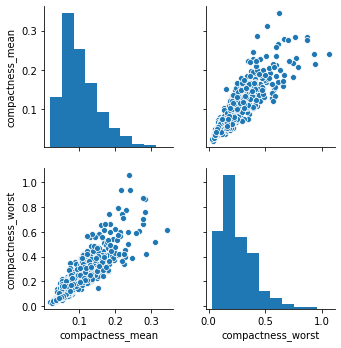

In [60]:
sns.pairplot(df[['compactness_mean', 'compactness_worst']])
#очевидная линейная зависимость

#### Boxplots

Используя boxplots и группировку по целевой переменной, можно проанализировать по каким признакам наиболее удобно отделить злокачественные новообразования от доброкачественных

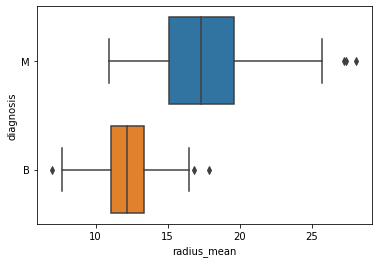

In [64]:
sns.boxplot(x='radius_mean', y='diagnosis', data = df)

У злокачественных опухолей средний радиус больше

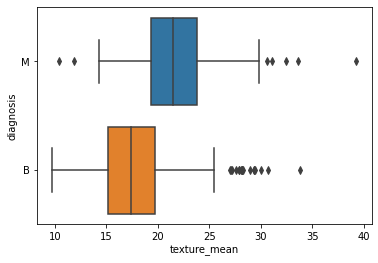

In [65]:
sns.boxplot(x='texture_mean', y='diagnosis', data = df)

У злокачественных опухолей texture_mean(отклонение серого) тоже больше

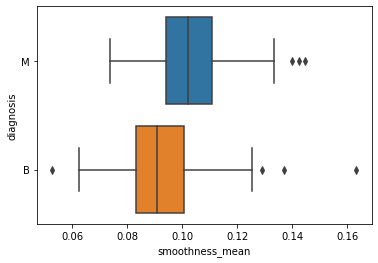

In [66]:
sns.boxplot(x='smoothness_mean', y='diagnosis', data = df)

У злокачественных опухолей smoothness также бывает в среднем больше